In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import re
import itertools
import pandas as pd
import time
import os
import pickle
from Functions import *

In [3]:
# set number of compoinds
NC=130
#set nomber of positives
D=2

In [4]:
WA=assign_wells_mat(NC)

In [5]:
np.sum(WA, axis=0)

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 10,  0, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 11, 11])

In [6]:
tf, WAS, countss= is_consistent(WA, D)
mean_metrics(WA, D)

(24.25684086905461, 1.2568408690546096, 1.7252595155709343, 86.0)

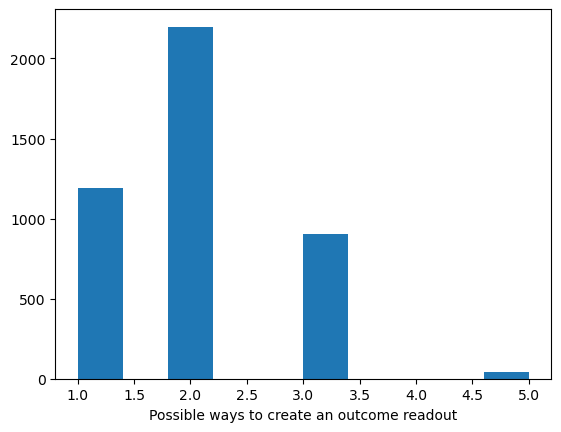

In [7]:
#Plot ambiguity
plt.hist(countss)
plt.xlabel('Possible ways to create an outcome readout')
plt.show()

In [8]:
# for random we also need a few more parameters
WA=assign_wells_random(NC,D, n_compounds_per_well=15, n_wells=25,guesses=100)

KeyboardInterrupt: 

In [ ]:

#MT=mean_tests(WA, dff)
mean_exp, _, perc_check= mean_metrics(WA, D)
print('To differentiate up to ', D, 'positives requires on average ', np.round(mean_exp,2), 
      ' tests with a probability of ', perc_check, '% of needing two rounds of testing' )


In [ ]:
#check shape for consistency
WA.shape

In [ ]:
#Print where a compound goes 
cp=np.random.randint(1,WA.shape[0]+1,1)
well_cp=from_compound_get_wells(cp,WA)
print('Compound', cp, 'needs to be in wells', well_cp)

In [ ]:
# Get all compounds for a well
wl=np.random.randint(1,WA.shape[1]+1,1)
cp_well=from_well_get_compuonds(wl,WA)
print('In well', wl, 'need to go compunds', cp_well)

In [ ]:
# Check answer ambiguity
tf, WAS, countss= is_consistent(WA, 2)

In [ ]:
#Plot ambiguity
plt.hist(countss)
plt.xlabel('Possible ways to create an outcome readout')
plt.show()

In [ ]:
avg_tst=mean_tests(countss)
print('with this assignment method on average ', np.round(avg_tst,2),'tests are needed')

In [ ]:
pr1=np.sum(countss[countss>1])/np.sum(countss)
#pr2=1-np.sum(countss[countss==1])/len(countss)
print('with this assignment method', np.round(pr1*100),'% of outcomes will lead to an ambiguous interpretation')

Do the same for the matrix like well construction

In [ ]:
#multidimensional matrix well assignment
WA=assign_wells_multidim(NC, n_dims=3)

In [ ]:
tf, WAS, countst= is_consistent(WA, D)

In [ ]:
plt.hist(countst)
plt.xlabel('Possible ways to create an outcome readout')
plt.show()

In [ ]:
cp=np.random.randint(1,WA.shape[0]+1,1)
well_cp=from_compound_get_wells(cp,WA)
print('Compound', cp, 'needs to be in wells', well_cp)

In [ ]:
wl=np.random.randint(1,WA.shape[1]+1,1)
cp_well=from_well_get_compuonds(wl,WA)
print('In well', wl, 'need to go compunds', cp_well)

In [20]:

def assign_wells_chinese(n_compounds:int,  differentiate:int, **kwargs)->np.array:
    prod=1
    n=1
    primes=[]
    c_id=np.arange(n_compounds) 
    while prod<n_compounds**differentiate:
        n=n+1
        if isprime(n):
            prod=prod*n
            primes.append(n)

    WA=np.zeros((np.sum(primes), n_compounds))==1
    past_primes=0
    for prime in primes:
        temp_wa=np.zeros((prime, n_compounds))==1
        for x in range(prime):
            ids=c_id%prime==x    
            temp_wa[x, ids]=True
        WA[past_primes:past_primes+prime,:]=temp_wa
        past_primes=past_primes+prime

    return(WA.T)


In [21]:
WA=assign_wells_STD(n_compounds=NC, differentiate=D)

19


In [10]:
tf, WASTD, countstd= is_consistent(WA, D)

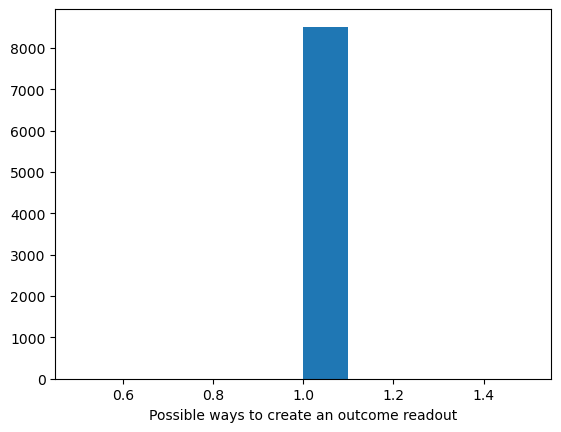

In [11]:
plt.hist(countstd)
plt.xlabel('Possible ways to create an outcome readout')
plt.show()

In [12]:
wl=np.random.randint(1,WA.shape[1]+1,1)
cp_well=from_well_get_compuonds(wl,WA)
print('In well', wl, 'need to go compunds', cp_well)

In well [32] need to go compunds [  4  14  17  27  30  40  43  51  61  64  74  84  87  97 105 108 118 121]


In [14]:
np.sum(WA, axis=0)

array([19, 19, 19, 19, 18, 18, 18, 19, 19, 19, 18, 18, 18, 19, 18, 18, 19,
       19, 19, 19, 18, 18, 18, 19, 19, 19, 19, 18, 19, 19, 19, 18, 18, 18,
       19])